## Objective
We use **pandas** library to for our data cleaning, manipulation and analysis in this project. 
We have three kind of datasets 1) GDP growth of most of the countries of the world in timeseries, 2) CO2 percapita emmision of the countries of the world in timeseries 3) Gross domestic expenditure on research and development (R&D) of some EU countries.
We aim to find if there is any correlation between GDP growth and CO2 percapita emmission. And If there is any correlation between expenditure on R&D and GDP grwoth.
At first we want to order data in such a way that we can calculate the correlation between GDP growth and CO2 percapita emmision. Then prepare data  to calculate the correlation between GDP growth and research and development (R&D). 

### Data and Data analysis
We import pandas as pd and and read our data which is in the form of CSV. And store our data as Pandas DataFrame with the names df for CO2 percapita emmission and Df with capital 'D' for GDP growth. We prefer to comment most of the code inside code cells.   

In [58]:
import pandas as pd
import matplotlib as mplt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df=pd.read_csv('co2_per_capita_emission.csv')
Df=pd.read_csv('GDP of each country.csv')

In [2]:
# Checking what are the columns name (variables name)

df.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object', length=224)

In [3]:
# Checking how the data looks like 

df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.28,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284
1,Angola,0.009,0.009,0.009,0.009,0.009,0.009,0.010,0.010,0.010,...,1.28,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230
2,Albania,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,2.27,2.250,2.040,2.010,2.130,2.080,2.050,2.000,2.120,2.100
3,Andorra,0.333,0.335,0.337,0.340,0.342,0.345,0.347,0.350,0.352,...,5.9,5.830,5.970,6.070,6.270,6.120,6.060,5.630,5.970,5.910
4,UAE,0.063,0.063,0.064,0.064,0.064,0.064,0.065,0.065,0.065,...,27,26.800,27.000,26.700,23.900,23.500,21.200,19.700,20.700,21.100


In [4]:
# Checking doing the check for the GDP growt data

Df.head()

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,5.377778e+08
1,Afghanistan,AFG,1961,5.488889e+08
2,Afghanistan,AFG,1962,5.466667e+08
3,Afghanistan,AFG,1963,7.511112e+08
4,Afghanistan,AFG,1964,8.000000e+08


In [5]:
Df=Df.drop(columns='Country Code')

In coding it is a good practice to use a short name without any space in between. So for this purpose we change the name of the columns.

In [6]:
Df=Df.rename(columns={'Country Name': 'country', 'Value':'gdpValue', 'Year':'year' })

In [7]:
Df.head()

,country,year,gdpValue
0,Afghanistan,1960,5.377778e+08
1,Afghanistan,1961,5.488889e+08
2,Afghanistan,1962,5.466667e+08
3,Afghanistan,1963,7.511112e+08
4,Afghanistan,1964,8.000000e+08


In [8]:
# Checking the data type to see if numerical inputs are in the form of intiger or float.

Df.dtypes

country      object
year          int64
gdpValue    float64
dtype: object

As we can see that the structure of our two datasets are not similar we need to change the structure of the datasets 
so we can make it fit our objectives. Here we are trying to restructure our CO2 percapita emission dataframe in the  shape of that of GDP growth. We use 'melt' function to do the job. We restore the transformed DataFrame with the name 'ndf'. And we are planning to merge the two datasets in order to find the correlation. We will merge the two datasets based on the 'country' and 'year' columns.

In [9]:
ndf=pd.melt(df, id_vars='country', value_vars=df.columns[1:], var_name='year', value_name='co2_perc')

In [10]:
# we sort the data based on two columns 'year' and 'country' in ascending order

ndf=ndf.sort_values(by=['country', 'year'], axis=0, ascending=True)

In [11]:
ndf.head()

,country,year,co2_perc
0,Afghanistan,1800,0.001
194,Afghanistan,1801,0.001
388,Afghanistan,1802,0.001
582,Afghanistan,1803,0.001
776,Afghanistan,1804,0.001


In [12]:
ndf.dtypes

country     object
year        object
co2_perc    object
dtype: object

In [13]:
#We need to make the data type of two the columns similar in order to merge based on them. 
# Here we are changing the data type of colunm 'year' to make it similar to the data type of 'year' in GDP growth dataset.

ndf['year']=ndf['year'].astype(int)

In [14]:
ndf.dtypes

country     object
year         int32
co2_perc    object
dtype: object

In [15]:
# Here we are merging the two datasets based on columns 'country' and 'year' and restore it to the dataframe with the name 'mergeDF'

mergeDF=pd.merge(ndf, Df, on=['country', 'year'])

In [16]:
mergeDF.head()

,country,year,co2_perc,gdpValue
0,Afghanistan,1960,0.046,5.377778e+08
1,Afghanistan,1961,0.054,5.488889e+08
2,Afghanistan,1962,0.074,5.466667e+08
3,Afghanistan,1963,0.074,7.511112e+08
4,Afghanistan,1964,0.086,8.000000e+08


In [17]:
mergeDF.head()

,country,year,co2_perc,gdpValue
0,Afghanistan,1960,0.046,5.377778e+08
1,Afghanistan,1961,0.054,5.488889e+08
2,Afghanistan,1962,0.074,5.466667e+08
3,Afghanistan,1963,0.074,7.511112e+08
4,Afghanistan,1964,0.086,8.000000e+08


In [18]:
# We check if there is any null values.  

mergeDF.isna().sum()

country     0
year        0
co2_perc    0
gdpValue    0
dtype: int64

In [19]:
mergeDF.dtypes 

country      object
year          int32
co2_perc     object
gdpValue    float64
dtype: object

In [20]:
# we convert 'co2_perc' column to float by using to_numeric function, as we see above that its type is object.


mergeDF['co2_perc']=pd.to_numeric(mergeDF['co2_perc'], errors='coerce')

In [21]:
mergeDF.dtypes

country      object
year          int32
co2_perc    float64
gdpValue    float64
dtype: object

In [22]:
mergeDF.head()

,country,year,co2_perc,gdpValue
0,Afghanistan,1960,0.046,5.377778e+08
1,Afghanistan,1961,0.054,5.488889e+08
2,Afghanistan,1962,0.074,5.466667e+08
3,Afghanistan,1963,0.074,7.511112e+08
4,Afghanistan,1964,0.086,8.000000e+08


In [23]:
# We can see our dataset's shape to check how big is our dataset

mergeDF.shape

(7829, 4)

In [24]:
# We want to see how GDP growth and CO2 percapit emission correlate. We calculate correlation by methode 'corr'

mergeDF[['co2_perc', 'gdpValue' ]].corr() 

,co2_perc,gdpValue
co2_perc,1.000000,0.184381
gdpValue,0.184381,1.000000


<AxesSubplot:xlabel='co2_perc', ylabel='gdpValue'>

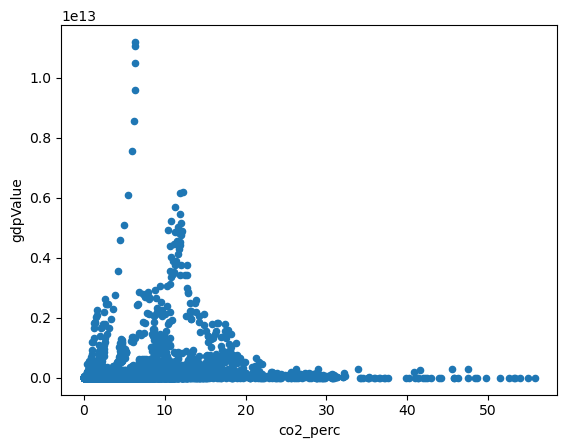

In [25]:
# Checking how this correlation looks visually, so we plot GDP growth on one axis and CO2 percapit emission on another. 

mergeDF.plot(kind='scatter', x='co2_perc', y='gdpValue')

<AxesSubplot:xlabel='year', ylabel='co2_perc'>

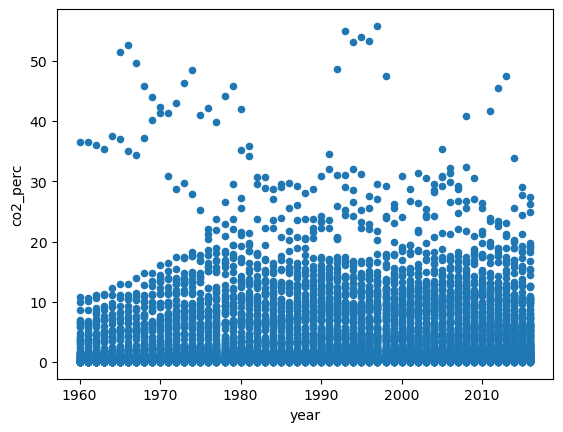

In [26]:
# Checking how CO2 percapit emission was changing over time

mergeDF.plot(kind='scatter', y='co2_perc', x='year')

<AxesSubplot:xlabel='year', ylabel='gdpValue'>

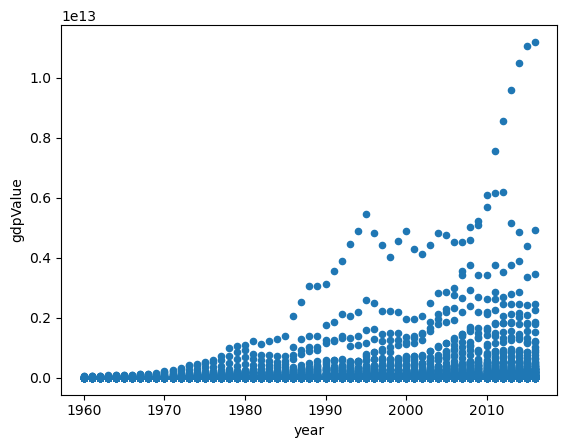

In [27]:
# Checking how GDP growth has changed over time.

mergeDF.plot(kind='scatter', x='year', y='gdpValue')

### Second part of the analysis
In this part we  concentrate on some Erupean countries and analyze how expenditure on research and development (R&D) correlate with GDP growth. The data is available in MS Excel form in Eurostat website (https://ec.europa.eu/eurostat/databrowser/view/tipsst10/default/table?lang=en). We read only the sheet one of this file. But befor uploading directly this data we have cleaned some part in Excel in order to make it suitable for the python.  

In [28]:
DF=pd.read_excel('Percentage of GDP used on R&D in EU Countries.xlsx', sheet_name='Sheet 1')

In [29]:
# Checking the columns 

DF.columns

Index(['TIME', '1995', 'Unnamed: 2', '1996', 'Unnamed: 4', '1997',
       'Unnamed: 6', '1998', 'Unnamed: 8', '1999', 'Unnamed: 10', '2000',
       'Unnamed: 12', '2001', 'Unnamed: 14', '2002', 'Unnamed: 16', '2003',
       'Unnamed: 18', '2004', 'Unnamed: 20', '2005', 'Unnamed: 22', '2006',
       'Unnamed: 24', '2007', 'Unnamed: 26', '2008', 'Unnamed: 28', '2009',
       'Unnamed: 30', '2010', 'Unnamed: 32', '2011', 'Unnamed: 34', '2012',
       'Unnamed: 36', '2013', 'Unnamed: 38', '2014', 'Unnamed: 40', '2015',
       'Unnamed: 42', '2016', 'Unnamed: 44', '2017', 'Unnamed: 46', '2018',
       'Unnamed: 48', '2019', 'Unnamed: 50', '2020', 'Unnamed: 52', '2021',
       'Unnamed: 54', '2022', 'Unnamed: 56'],
      dtype='object')

In [30]:
# Checking the dataframe

DF.head()

,TIME,1995,Unnamed: 2,1996,Unnamed: 4,1997,Unnamed: 6,1998,Unnamed: 8,1999,...,2018,Unnamed: 48,2019,Unnamed: 50,2020,Unnamed: 52,2021,Unnamed: 54,2022,Unnamed: 56
0,European Union - 27 countries (from 2020),:,NaN,:,NaN,:,NaN,:,NaN,:,...,2.18,e,2.22,e,2.30,e,2.27,e,2.24,e
1,Euro area – 20 countries (from 2023),:,NaN,:,NaN,:,NaN,:,NaN,:,...,2.21,e,2.25,NaN,2.33,e,2.30,NaN,2.27,e
2,Belgium,1.65,NaN,1.74,NaN,1.81,NaN,1.84,NaN,1.91,...,2.86,NaN,3.16,NaN,3.40,NaN,3.43,NaN,3.43,p
3,Bulgaria,0.43,NaN,0.42,b,0.47,NaN,0.48,NaN,0.54,...,0.75,NaN,0.83,NaN,0.85,NaN,0.77,NaN,0.77,NaN
4,Czechia,0.88,b,0.89,NaN,0.99,NaN,1.06,NaN,1.05,...,1.90,NaN,1.93,NaN,1.99,NaN,2.00,NaN,1.96,p


In [31]:
# Observing from the dataframe that there are alot of redendent columns that need to be deleted. 
# We make this list of the redendent columns. 



ListNoName=['Unnamed: 2',
'Unnamed: 4',
'Unnamed: 6',
'Unnamed: 8',
'Unnamed: 10',
'Unnamed: 12',
'Unnamed: 14',
'Unnamed: 16',
'Unnamed: 18',
'Unnamed: 20',
'Unnamed: 22',
'Unnamed: 24',
'Unnamed: 26',
'Unnamed: 28',
'Unnamed: 30',
'Unnamed: 32',
'Unnamed: 34',
'Unnamed: 36',
'Unnamed: 38',
'Unnamed: 40',
'Unnamed: 42',
'Unnamed: 44',
'Unnamed: 46',
'Unnamed: 48',
'Unnamed: 50',
'Unnamed: 52',
'Unnamed: 54',
'Unnamed: 56']

In [32]:
# We delete the redendent columns

DF=DF.drop(columns=ListNoName)

In [33]:
DF.columns

Index(['TIME', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')

In [34]:
DF.head()

,TIME,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,European Union - 27 countries (from 2020),:,:,:,:,:,1.81,1.82,1.83,1.83,...,2.10,2.11,2.12,2.12,2.15,2.18,2.22,2.30,2.27,2.24
1,Euro area – 20 countries (from 2023),:,:,:,:,:,1.78,1.8,1.81,1.81,...,2.11,2.13,2.13,2.14,2.18,2.21,2.25,2.33,2.30,2.27
2,Belgium,1.65,1.74,1.81,1.84,1.91,1.94,2.03,1.9,1.84,...,2.33,2.37,2.43,2.52,2.67,2.86,3.16,3.40,3.43,3.43
3,Bulgaria,0.43,0.42,0.47,0.48,0.54,0.5,0.45,0.46,0.47,...,0.63,0.79,0.95,0.77,0.74,0.75,0.83,0.85,0.77,0.77
4,Czechia,0.88,0.89,0.99,1.06,1.05,1.11,1.1,1.1,1.14,...,1.88,1.96,1.92,1.67,1.77,1.90,1.93,1.99,2.00,1.96


In [35]:
DF.dtypes

TIME     object
1995     object
1996     object
1997     object
1998     object
1999     object
2000     object
2001     object
2002     object
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

In [36]:
DF.isna().sum()

TIME    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [37]:
# there are missing values in in the form of ':' in dataset till 2003 so we delete this part. 

DF=DF.drop(columns=['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002'])

In [38]:
DF.columns


Index(['TIME', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [39]:
# Two first rows are EU aggregation wich we do not need so we drop the two first rows from the dataframe
DF=DF.drop([0,1])

In [40]:
# To have a brieve summary of statistical charectarestics we use the 'describe' function. 

DF.describe()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.274074,1.283333,1.298889,1.339630,1.338889,1.423333,1.487407,1.500741,1.571481,1.600741,1.605926,1.597407,1.605556,1.542222,1.573333,1.619630,1.672963,1.764815,1.750000,1.738519
std,0.914685,0.872283,0.868050,0.869387,0.851615,0.909704,0.954993,0.923126,0.929324,0.924733,0.913721,0.883527,0.861280,0.896353,0.886796,0.886894,0.902402,0.908762,0.907346,0.912839
min,0.240000,0.340000,0.370000,0.380000,0.400000,0.390000,0.440000,0.440000,0.450000,0.440000,0.390000,0.380000,0.480000,0.440000,0.510000,0.500000,0.480000,0.470000,0.470000,0.460000
25%,0.555000,0.540000,0.570000,0.615000,0.570000,0.630000,0.645000,0.670000,0.730000,0.795000,0.815000,0.860000,0.985000,0.845000,0.890000,0.945000,1.035000,1.115000,1.070000,0.980000
50%,1.020000,1.040000,1.040000,1.110000,1.130000,1.250000,1.360000,1.360000,1.420000,1.300000,1.320000,1.340000,1.250000,1.240000,1.280000,1.350000,1.400000,1.510000,1.460000,1.460000
75%,1.810000,1.805000,1.780000,1.780000,1.760000,1.785000,1.905000,2.055000,2.250000,2.255000,2.285000,2.300000,2.215000,2.185000,2.190000,2.170000,2.185000,2.295000,2.245000,2.240000
max,3.580000,3.360000,3.360000,3.470000,3.340000,3.540000,3.730000,3.710000,3.620000,3.400000,3.270000,3.150000,3.220000,3.250000,3.360000,3.320000,3.390000,3.490000,3.430000,3.430000


In [41]:
DF.head()

,TIME,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Belgium,1.84,1.82,1.79,1.82,1.85,1.94,2.00,2.06,2.17,...,2.33,2.37,2.43,2.52,2.67,2.86,3.16,3.40,3.43,3.43
3,Bulgaria,0.47,0.47,0.44,0.44,0.43,0.45,0.49,0.56,0.53,...,0.63,0.79,0.95,0.77,0.74,0.75,0.83,0.85,0.77,0.77
4,Czechia,1.14,1.14,1.16,1.23,1.30,1.23,1.29,1.33,1.54,...,1.88,1.96,1.92,1.67,1.77,1.90,1.93,1.99,2.00,1.96
5,Denmark,2.51,2.42,2.39,2.40,2.52,2.77,3.06,2.92,2.94,...,2.97,2.91,3.05,3.09,2.93,2.97,2.94,2.97,2.76,2.89
6,Germany,2.47,2.44,2.44,2.47,2.46,2.62,2.74,2.73,2.81,...,2.84,2.88,2.93,2.94,3.05,3.11,3.17,3.13,3.13,3.13


In [42]:
# Chaning name 'TIME' to the 'country'

DF=DF.rename(columns={'TIME':'country'})

In [43]:
# Changing the shape of the DataFrame by using melt methode.  

NDF=pd.melt(DF, id_vars='country', value_vars=DF.columns[1:], var_name='year', value_name='RnDvalue')

In [51]:
NDF.head()

,country,year,RnDvalue
0,Belgium,2003,1.84
1,Bulgaria,2003,0.47
2,Czechia,2003,1.14
3,Denmark,2003,2.51
4,Germany,2003,2.47


In [45]:
NDF.dtypes

country      object
year         object
RnDvalue    float64
dtype: object

In [46]:
# As the 'year' column is not in intiger form we change to intiger.

NDF['year']=NDF['year'].astype(int)

In [47]:
# We merge the two datasets(research and development (R&D) and GDP growth), in order to facilitate analysis.

merged_DF=pd.merge(NDF, Df, on=['country', 'year'])

In [48]:
merged_DF.head()

,country,year,RnDvalue,gdpValue
0,Belgium,2003,1.84,3.190028e+11
1,Bulgaria,2003,0.47,2.107478e+10
2,Denmark,2003,2.51,2.180960e+11
3,Germany,2003,2.47,2.505734e+12
4,Estonia,2003,0.76,9.833871e+09


In [49]:
# we calculate the correation coeffiecent of research and development (R&D) and GDP growth.

merged_DF[['RnDvalue', 'gdpValue']].corr()

,RnDvalue,gdpValue
RnDvalue,1.00000,0.33915
gdpValue,0.33915,1.00000


<AxesSubplot:xlabel='RnDvalue', ylabel='gdpValue'>

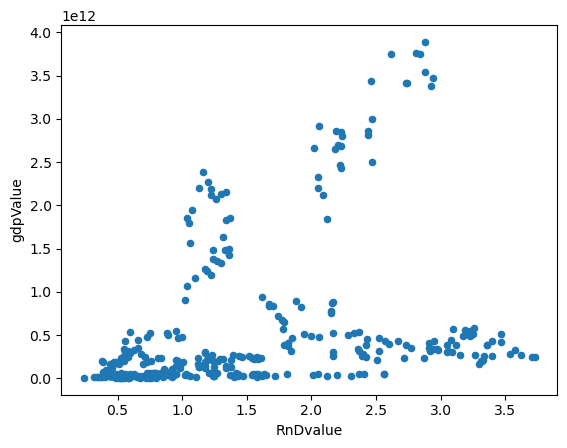

In [50]:
# We plot to see the visually the relationship of research and development (R&D) and GDP growth

merged_DF.plot(kind='scatter', x= 'RnDvalue', y='gdpValue')

In [66]:
#Running regression while y='gdpValue' and X='RnDvalue' to see the relationship between tow variables.
# And Finding R squared.

model=LinearRegression()
model.fit(merged_DF[['RnDvalue']], merged_DF[['gdpValue']] )
intercept=model.intercept_
coeffecient=model.coef_
print('Intercentp:' , intercept, 'Coefficeint:', coeffecient)
yPred=model.predict(merged_DF[['RnDvalue']])
r2Score=r2_score( merged_DF[['gdpValue']]
, yPred)
print('R-Squre:',r2Score)

Intercentp: [6.86893605e+10] Coefficeint: [[3.19346466e+11]]
R-Squre: 0.11502254634301812


In the above when running regression we find out that R-Square is low and it shows that the relationship between two variables are weak. 

Till now we have been using the expenditure on research and development (R&D) as a percentage of GDP, it would be interesting to calculate the exact amount spend on R&D and its relationship with the GDP. For doing that we already have all the information and we can calculate it easily be multiplying the two variable and dividing be 100.  

In [54]:


merged_DF['RnD_amount']=merged_DF['RnDvalue']*merged_DF['gdpValue']/100

In [55]:
merged_DF.head()

,country,year,RnDvalue,gdpValue,RnD_amount
0,Belgium,2003,1.84,3.190028e+11,5.869652e+09
1,Bulgaria,2003,0.47,2.107478e+10,9.905144e+07
2,Denmark,2003,2.51,2.180960e+11,5.474210e+09
3,Germany,2003,2.47,2.505734e+12,6.189162e+10
4,Estonia,2003,0.76,9.833871e+09,7.473742e+07


In [56]:
# To find the correlation coefficeint we use corr methode

merged_DF[['gdpValue', 'RnD_amount']].corr()

,gdpValue,RnD_amount
gdpValue,1.000000,0.949639
RnD_amount,0.949639,1.000000


<AxesSubplot:xlabel='gdpValue', ylabel='RnD_amount'>

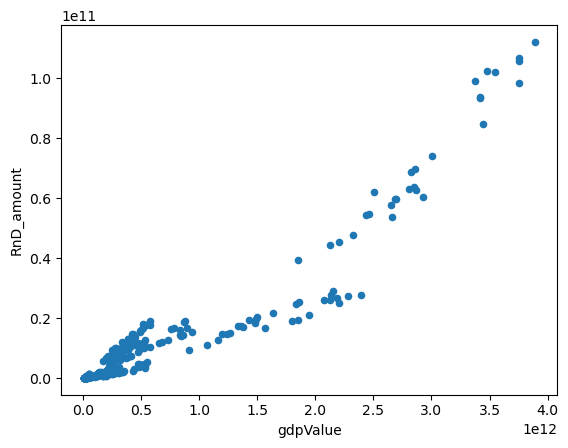

In [57]:
# ploting the two variables in a scatter plot to see the pattern visually.

merged_DF.plot(kind='scatter', x='gdpValue', y='RnD_amount') 

In [67]:
# running regression to see if the regression model support the stron relationship between the two varibles.

model1=LinearRegression()
model1.fit(merged_DF[['RnD_amount']], merged_DF[['gdpValue']] )
intercept1=model1.intercept_
coeffecient1=model1.coef_
print('Intercentp:' , intercept1, 'Coefficeint:', coeffecient1)
yPred1=model1.predict(merged_DF[['RnD_amount']])
r2Score1=r2_score( merged_DF[['gdpValue']]
, yPred1)
print('R-Squre:',r2Score1)

Intercentp: [1.16175443e+11] Coefficeint: [[39.8255197]]
R-Squre: 0.9018142721235525


The result for exact amount used in R&D is strongly correlate with the GDP which is also indicated in the regression analysis. This finding seems intuitive as economies with bigger GDPs use bigger amount in R&D. 